<ipython-input-1-bd4eb2e87270>:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  team_comparison_1 = age_1.groupby('teamID').mean()
<ipython-input-1-bd4eb2e87270>:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  team_comparison_2 = age_2.groupby('teamID').mean()
<ipython-input-1-bd4eb2e87270>:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  team_comparison_3 = age_3.groupby('teamID').mean()


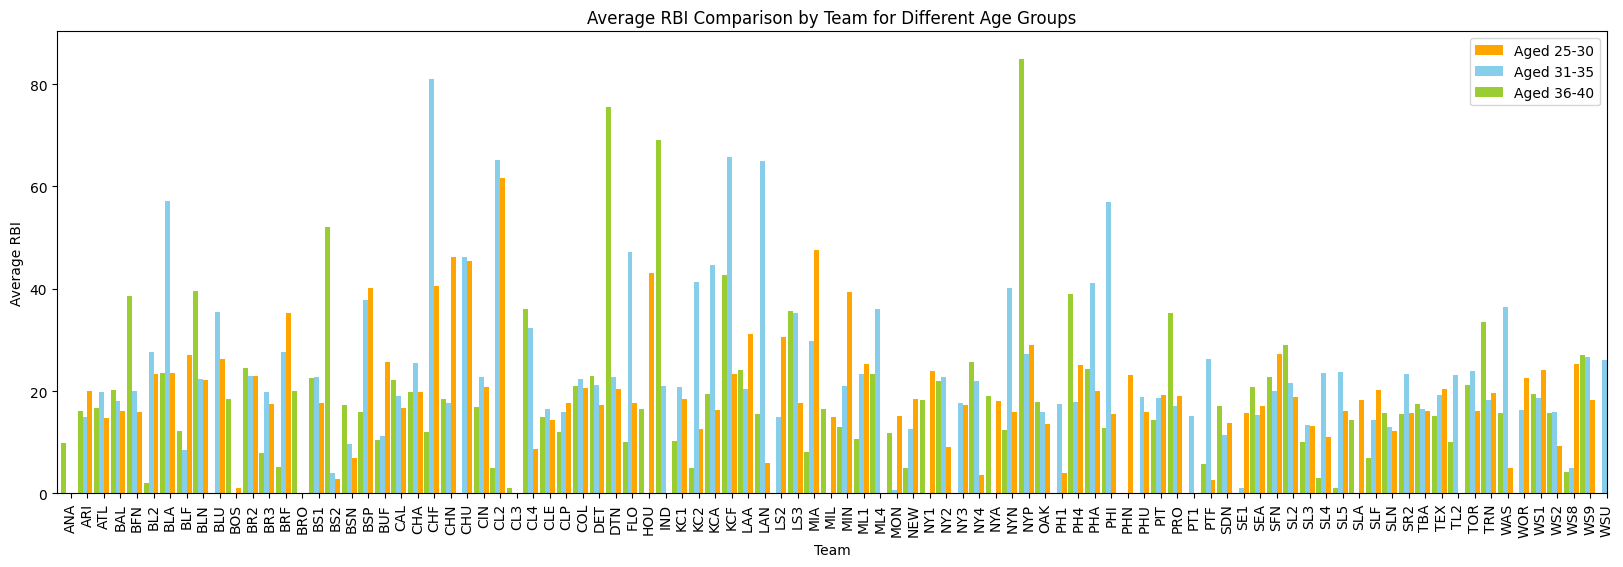

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data loading
people = pd.read_csv('/content/People.csv')
batting = pd.read_csv('/content/Batting.csv')

# Merge the two tables on 'playerID'
batting_players = pd.merge(people, batting, on='playerID')

# Calculate age
batting_players['age'] = batting_players['yearID'] - batting_players['birthYear']

# Select age ranges for analysis
age_range_1 = (25, 30)
age_range_2 = (31, 35)
age_range_3 = (36, 40)
# Filter data for the selected age ranges
age_1 = batting_players[(batting_players['age'] >= age_range_1[0]) & (batting_players['age'] <= age_range_1[1])]
age_2 = batting_players[(batting_players['age'] >= age_range_2[0]) & (batting_players['age'] <= age_range_2[1])]
age_3 = batting_players[(batting_players['age'] >= age_range_3[0]) & (batting_players['age'] <= age_range_3[1])]
# Group data by team and calculate average batting statistics
team_comparison_1 = age_1.groupby('teamID').mean()
team_comparison_2 = age_2.groupby('teamID').mean()
team_comparison_3 = age_3.groupby('teamID').mean()
# Plotting
fig, ax = plt.subplots(figsize=(20, 6))

# Plot bars for the first age group
team_comparison_1['RBI'].plot(kind='bar', position=0, width=0.3, color='orange', label=f'Aged {age_range_1[0]}-{age_range_1[1]}')
team_comparison_2['RBI'].plot(kind='bar', position=1, width=0.3, color='skyblue', label=f'Aged {age_range_2[0]}-{age_range_2[1]}')
team_comparison_3['RBI'].plot(kind='bar', position=2, width=0.3, color='yellowgreen', label=f'Aged {age_range_3[0]}-{age_range_3[1]}')

plt.xlabel('Team')
plt.ylabel('Average RBI')
plt.title(f'Average RBI Comparison by Team for Different Age Groups')
plt.legend()
plt.show()


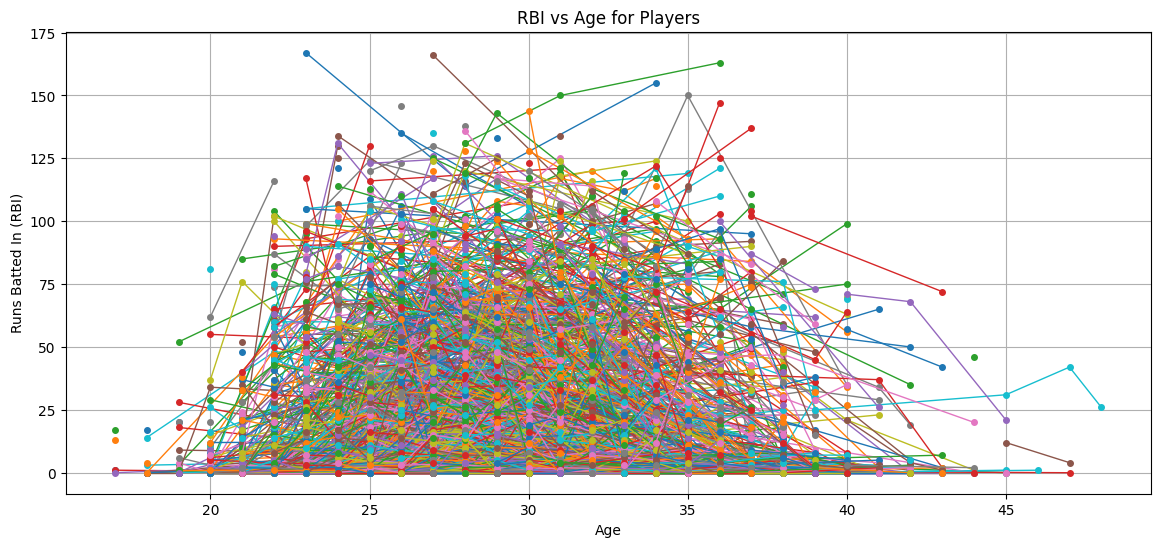

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data loading
master = pd.read_csv('/content/People.csv')
batting = pd.read_csv('/content/Batting.csv')

# Merge the two tables on 'playerID'
batting_player = pd.merge(master, batting, on='playerID')
batting_player=batting_player.sample(frac=0.1)
# Calculate age
batting_player['age'] = batting_player['yearID'] - batting_player['birthYear']
batting_player.sort_values('age', inplace=True)
# Plot line graph with different colors for each playerID
player_ids = batting_player['playerID'].unique()

plt.figure(figsize=(14, 6))

for player_id in player_ids:
    player_data = batting_player[batting_player['playerID'] == player_id]
    plt.plot(player_data['age'], player_data['RBI'], marker='o', linestyle='-', label=f'Player {player_id}', linewidth=1, markersize=4)

plt.xlabel('Age')
plt.ylabel('Runs Batted In (RBI)')
plt.title('RBI vs Age for Players')

plt.grid(True)
plt.show()


<ipython-input-4-f9e9aad0f91e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitchers['BattingAveragepitchers'] = pitchers['H'] / pitchers['AB']
<ipython-input-4-f9e9aad0f91e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batters['BattingAveragebatters'] = batters['H'] / batters['AB']


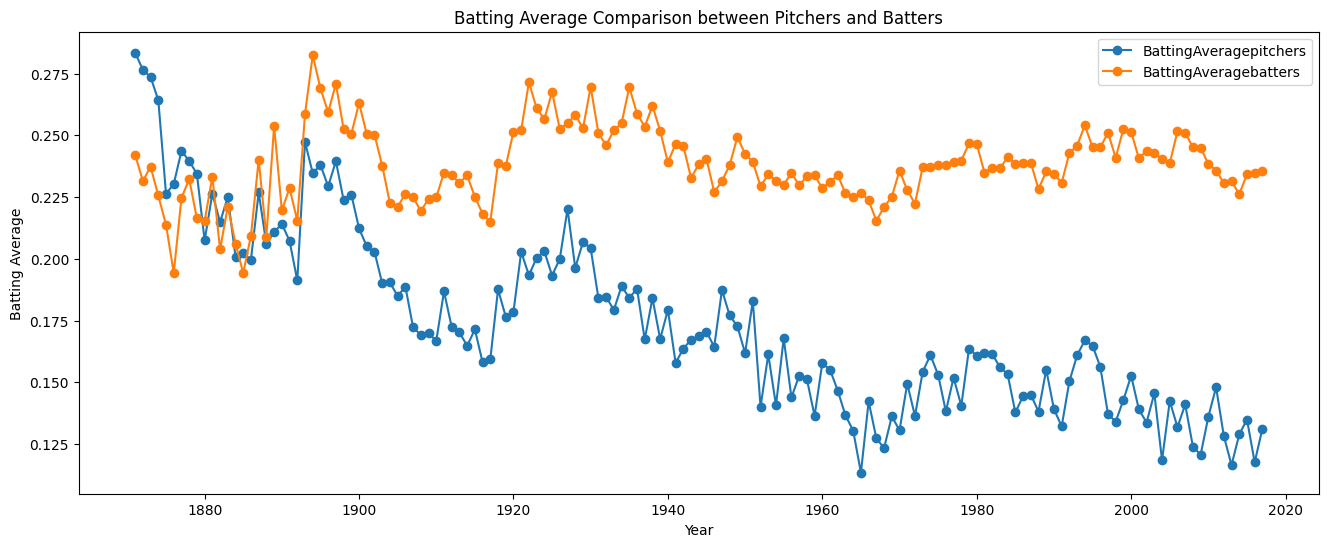

In [ ]:
# Sample data loading
batting = pd.read_csv('/content/Batting.csv')
pitching = pd.read_csv('/content/Pitching.csv')

# Extract unique playerIDs from the Pitching table
pitchers_player_ids = pitching['playerID'].unique()

# Filter Batting table for remaining players (not in the Pitching table)
batters = batting[~batting['playerID'].isin(pitchers_player_ids)]
pitchers = batting[batting['playerID'].isin(pitchers_player_ids)]

# Calculate Batting Average (H/AB) for both groups
pitchers['BattingAveragepitchers'] = pitchers['H'] / pitchers['AB']
batters['BattingAveragebatters'] = batters['H'] / batters['AB']

# Merge pitchers and batters on 'playerID' and 'yearID'
players = pd.merge(pitchers[['playerID', 'yearID', 'BattingAveragepitchers']], batters[['playerID', 'yearID', 'BattingAveragebatters']], on=['playerID', 'yearID'], how='outer')

# Plotting
fig, ax = plt.subplots(figsize=(16, 6))

ss = players.groupby('yearID').agg({'BattingAveragepitchers':'mean', 'BattingAveragebatters':'mean'}).reset_index()

# Plotting BattingAveragep
ax.plot(ss['yearID'], ss['BattingAveragepitchers'], marker='o', label='BattingAveragepitchers')

# Plotting BattingAverageb
ax.plot(ss['yearID'], ss['BattingAveragebatters'], marker='o', label='BattingAveragebatters')

# Set plot labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Batting Average')
ax.set_title('Batting Average Comparison between Pitchers and Batters')
ax.legend()

# Show the plot
plt.show()

